In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
import os
%matplotlib inline
os.environ['HOPSWORKS_API_KEY'] = 'cKV1tKzokpcwviY6.uP2qcFV2wWI8xxNu1I0UxyeqlRHqSEanLgKFjf5R1ypSy8A3AUnRkRpi0R9Gc5l0'

In [2]:
import hopsworks
import pandas as pd

In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/196759
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df['quality'] = wine_df['quality'].astype('float64')
wine_df

,fixed_acidity,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide,alcohol,quality
0,7.4,1.9,11.0,34.0,9.4,5.0
1,7.8,2.6,25.0,67.0,9.8,5.0
2,7.8,2.3,15.0,54.0,9.8,5.0
3,11.2,1.9,17.0,60.0,9.8,6.0
4,7.4,1.9,11.0,34.0,9.4,5.0
...,...,...,...,...,...,...
1594,6.2,2.0,32.0,44.0,10.5,5.0
1595,5.9,2.2,39.0,51.0,11.2,6.0
1596,6.3,2.3,29.0,40.0,11.0,6.0
1597,5.9,2.0,32.0,44.0,10.2,5.0


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   residual_sugar        1599 non-null   float64
 2   free_sulfur_dioxide   1599 non-null   float64
 3   total_sulfur_dioxide  1599 non-null   float64
 4   alcohol               1599 non-null   float64
 5   quality               1599 non-null   float64
dtypes: float64(6)
memory usage: 75.1 KB


In [6]:
wine_df.describe()

,fixed_acidity,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,2.538806,15.874922,46.467792,10.422983,5.636023
std,1.741096,1.409928,10.460157,32.895324,1.065668,0.807569
min,4.600000,0.900000,1.000000,6.000000,8.400000,3.000000
25%,7.100000,1.900000,7.000000,22.000000,9.500000,5.000000
50%,7.900000,2.200000,14.000000,38.000000,10.200000,6.000000
75%,9.200000,2.600000,21.000000,62.000000,11.100000,6.000000
max,15.900000,15.500000,72.000000,289.000000,14.900000,8.000000


In [7]:
wine_df['quality'].value_counts()

quality
5.0    681
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)  our Iris Data

Let's look at our iris flower - the distribution and range of values for the 4 different features
 * sepal_length
 * sepal_width
 * petal_length
 * petal_width
 
 and the target variable is `variety`.

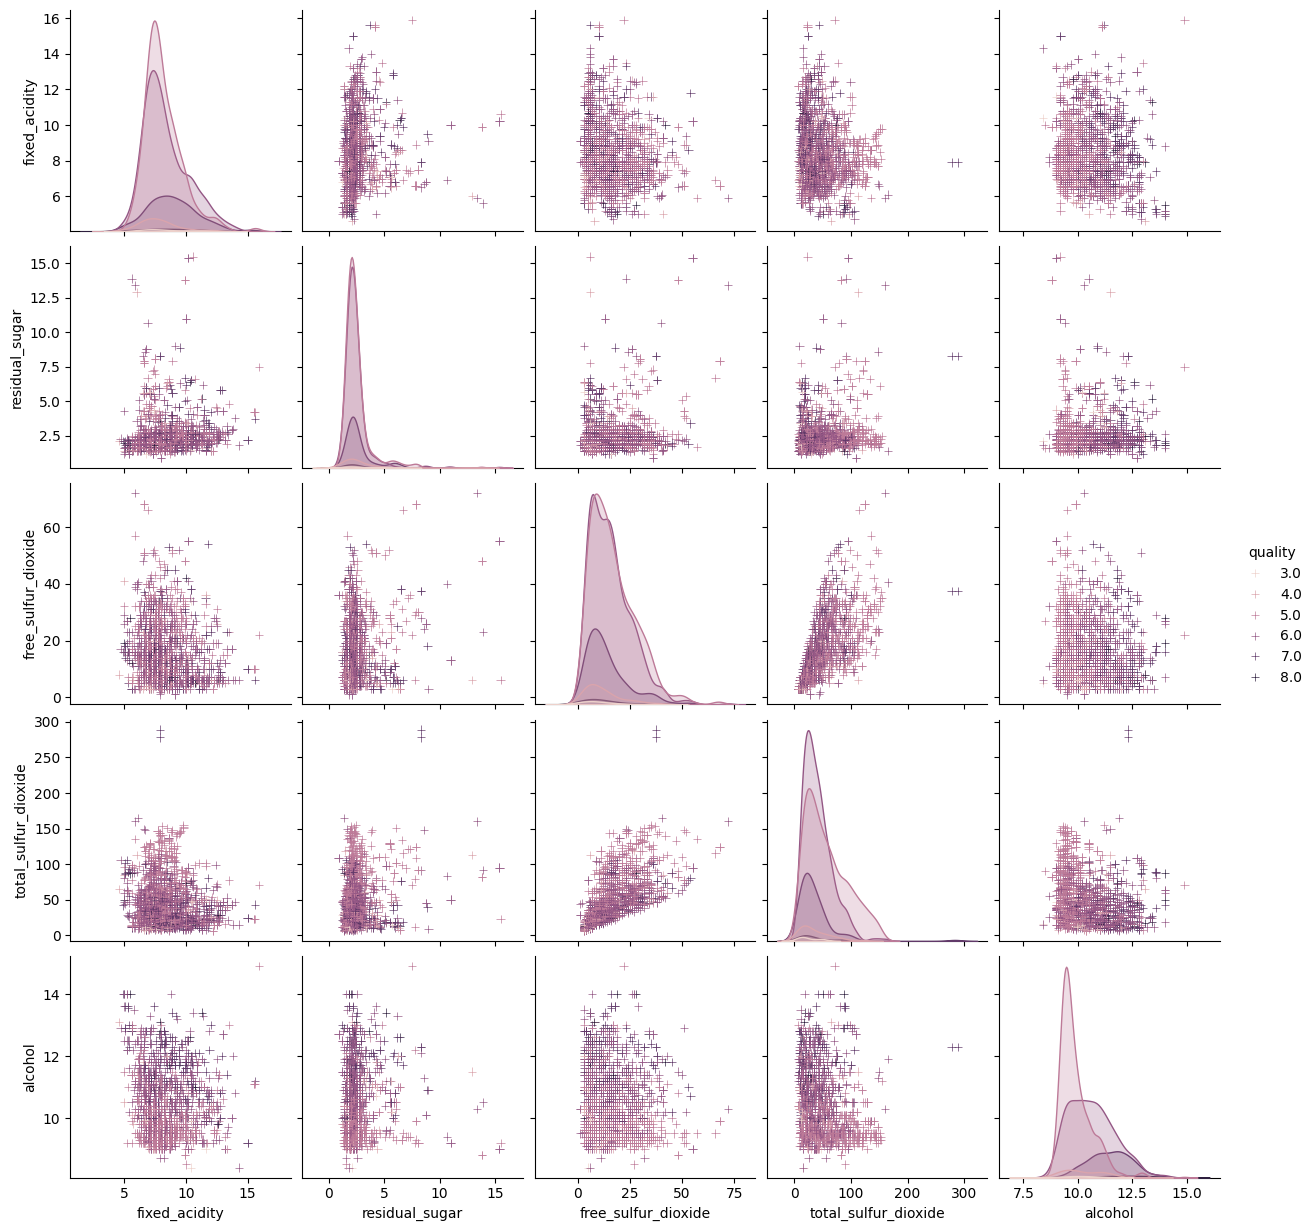

In [8]:
g = sns.pairplot(wine_df, hue='quality', markers='+')
plt.show()

### Visualize range of values 

We want to design a simulator generate the 3 types of iris flower (setosa, versicolor, virginica).
To do this, we can visualize the range of values for the length and width of the sepal and petal for each of the 3 flowers.

2023-11-19 17:05:26,396 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 17:05:26,406 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


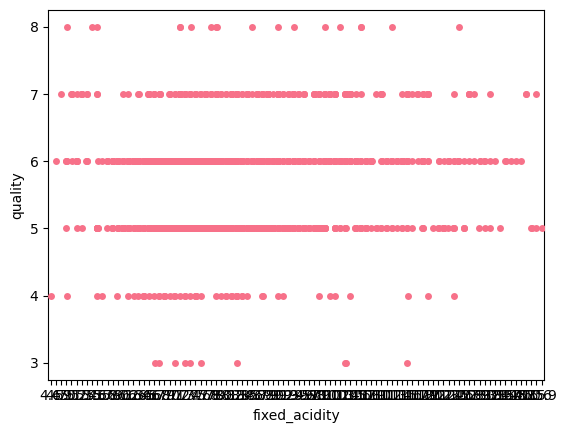

2023-11-19 17:05:27,975 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 17:05:27,986 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


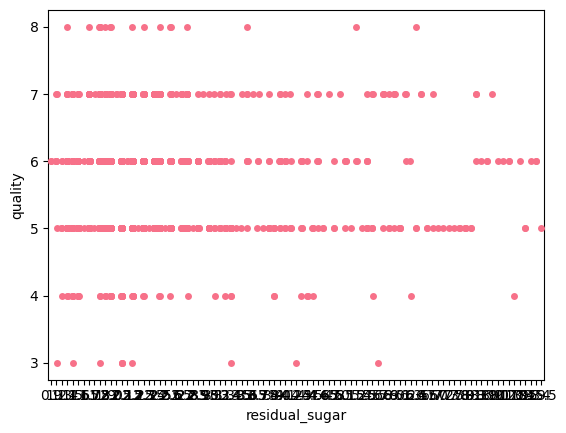

2023-11-19 17:05:29,379 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 17:05:29,391 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


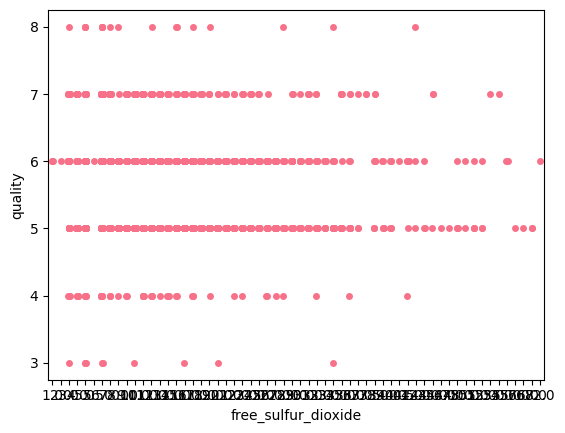

2023-11-19 17:05:30,253 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 17:05:30,263 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


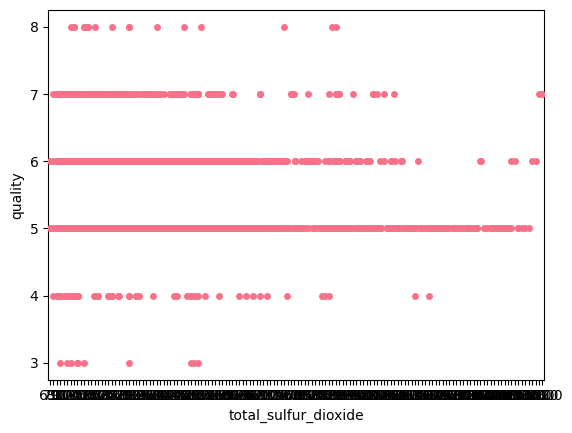

2023-11-19 17:05:32,239 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 17:05:32,250 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


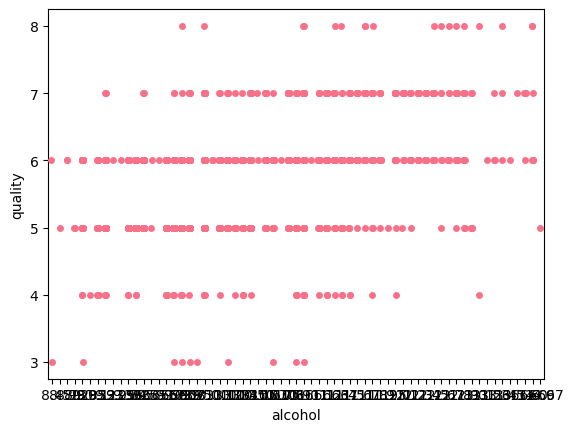

In [9]:
wine_df['quality'] = wine_df['quality'].astype(float)
g = sns.stripplot(y='quality', x='fixed_acidity', data=wine_df, jitter=True)
plt.show()
g = sns.stripplot(y='quality', x='residual_sugar', data=wine_df, jitter=True)
plt.show()
g = sns.stripplot(y='quality', x='free_sulfur_dioxide', data=wine_df, jitter=True)
plt.show()
g = sns.stripplot(y='quality', x='total_sulfur_dioxide', data=wine_df, jitter=True)
plt.show()
g = sns.stripplot(y='quality', x='alcohol', data=wine_df, jitter=True)
plt.show()

### Insert our Iris DataFrame into a FeatureGroup
Let's write our historical iris feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [10]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["fixed_acidity", "residual_sugar", "free_sulfur_dioxide", "total_sulfur_dioxide", "alcohol"],
    description="Wine quality dataset")
wine_fg.insert(wine_df)

Uploading Dataframe: 0.00% |          | Rows 0/1599 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/196759/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x21a76c0d6a0>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent iris flower data from being written your your feature group if you write values outside the expected ranges.

In [11]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [12]:
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")

expect(suite, "fixed_acidity", 4.6, 15.9)
expect(suite, "residual_sugar", 0.9, 15.5)
expect(suite, "free_sulfur_dioxide", 1, 72)
expect(suite, "total_sulfur_dioxide", 6, 289)
expect(suite, "alcohol", 8.4, 14.9)
wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/196759/fs/196678/fg/237936
